<a href="https://colab.research.google.com/github/sadikinisaac/housingprediction/blob/master/housepricepredictionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the dependencies
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
from google.colab import files
uploaded = files.upload()

Saving housepricedata.csv to housepricedata.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['housepricedata.csv']))

df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [5]:
#Convert the data into an array
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [0]:
#Split the data set
X = dataset[:,0:10]
Y = dataset[:,10]

In [7]:
#the min-max scaler method scales the dataset so that all the input features lie between 0 and 1 inclusive
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [8]:
#Split the data into 80% training and 20% (testing (10%) and validation (10%))
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

#the training set has 1022 data points while the validation and test set has 219 data points each. The X variables have 10 input features, while the Y variables only has one feature to predict.
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1168, 10) (146, 10) (146, 10) (1168,) (146,) (146,)


In [9]:
#Build the model and architecture of the deep neural network
from keras.models import Sequential
from keras.layers import Dense

# The models architechture 4 layers, 3 with 32 neurons and activation function = relu function, 
# the last layer has 1 neuron with an activation function = sigmoid function which returns a value btwn 0 and 1
# The input shape/ input_dim = 10 the number of features in the data set
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [10]:
# loss measuers how well the model did on training , and then tries to improve on it using the optimizer
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
#Train the model
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))




Train on 1168 samples, validate on 146 samples
Epoch 1/100





1168/1168 [==============================] - 1s 555us/step - loss: 0.6808 - acc: 0.5009 - val_loss: 0.6804 - val_acc: 0.5000
Epoch 2/100
1168/1168 [==============================] - 0s 45us/step - loss: 0.6754 - acc: 0.5034 - val_loss: 0.6762 - val_acc: 0.5068
Epoch 3/100
1168/1168 [==============================] - 0s 42us/step - loss: 0.6706 - acc: 0.5171 - val_loss: 0.6717 - val_acc: 0.5274
Epoch 4/100
1168/1168 [==============================] - 0s 46us/step - loss: 0.6657 - acc: 0.5514 - val_loss: 0.6670 - val_acc: 0.5616
Epoch 5/100
1168/1168 [==============================] - 0s 44us/step - loss: 0.6605 - acc: 0.6353 - val_loss: 0.6623 - val_acc: 0.6370
Epoch 6/100
1168/1168 [==============================] - 0s 44us/step - loss: 0.6550 - acc: 0.6978 - val_loss: 0.6571 - val_acc: 0.6781
Epoch 7/100
1168/1168 [==============================] - 0s 41us/step - loss: 0.6491 - acc: 0.7312 - val_loss: 0.6512 - val_acc:

In [12]:
#The reason why have the index 1 after the model.evaluate function is because
#the function returns the loss as the first element and the accuracy as the 
#second element. To only output the accuracy, simply access the second element 
#(which is indexed by 1, since the first element starts its indexing from 0).
model.evaluate(X_test, Y_test)[1]

146/146 [==============================] - 0s 118us/step


0.9041095898575979

In [13]:
#Make a prediction
prediction = model.predict(X_test)
prediction  = [1 if y>=0.85 else 0 for y in prediction] #Threshold
print(prediction)
print(Y_test)

[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]
[1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1
 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1
 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1]


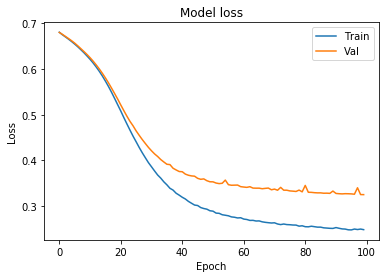

In [14]:
#visualize the training loss and the validation loss to see if the model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

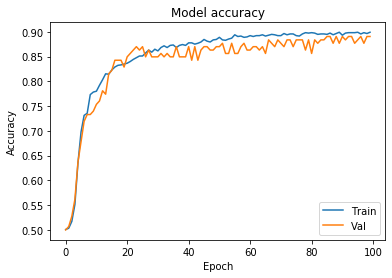

In [15]:
#visualize the training accuracy and the validation accuracy to see if the model is overfitting
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()